# Three types of Transformation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate non normal data (exponential distribution)
np.random.seed(0)
df = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [3]:
df.isnull().sum()

values    0
dtype: int64

In [20]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

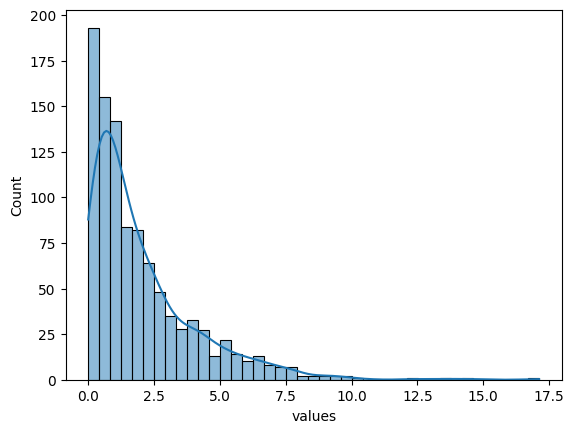

In [4]:
sns.histplot(df['values'], kde=True)

In [32]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')

pt_yeo_jhonson = PowerTransformer(method='yeo-johnson')
quartile = QuantileTransformer(output_distribution='normal')

df['box-cox'] = pt_boxcox.fit_transform(df[['values']]+1 )
df['yeo-jhonson'] = pt_yeo_jhonson.fit_transform(df[['values']])
df['qu-normal'] = quartile.fit_transform(df[['values']])
df.head()

,values,box-cox,yeo-jhonson,qu-normal
0,1.591749,0.179335,0.179335,0.162552
1,2.511862,0.677331,0.677331,0.587964
2,1.846446,0.339698,0.339698,0.286135
3,1.574402,0.167607,0.167607,0.157469
4,1.102097,-0.202107,-0.202107,-0.154930


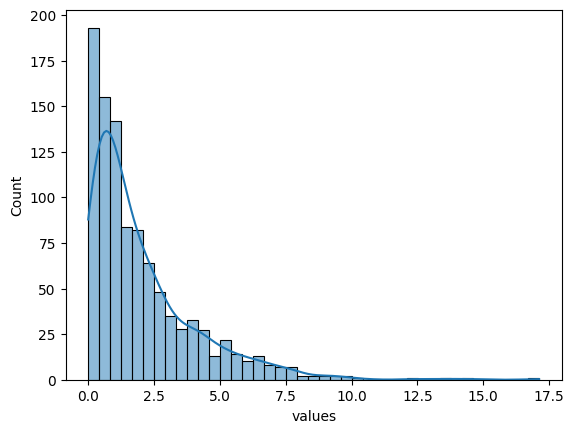

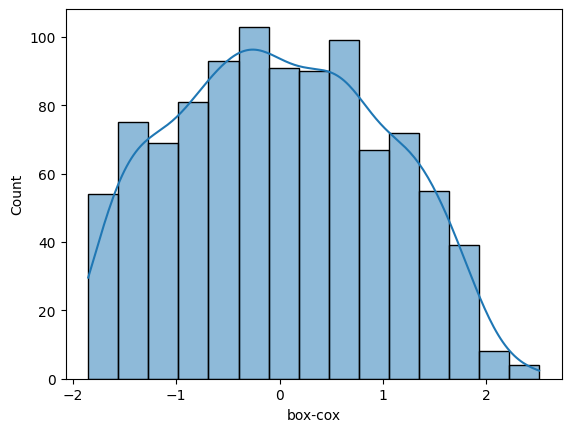

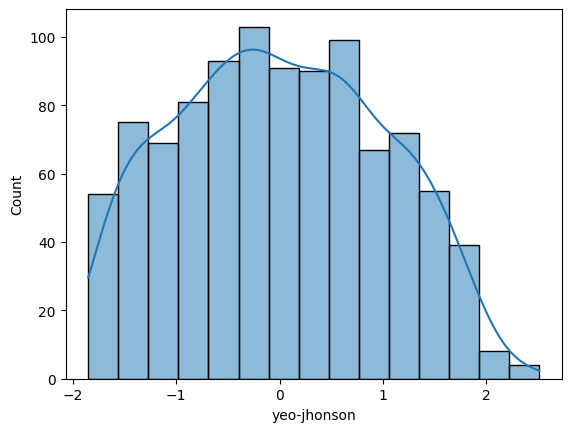

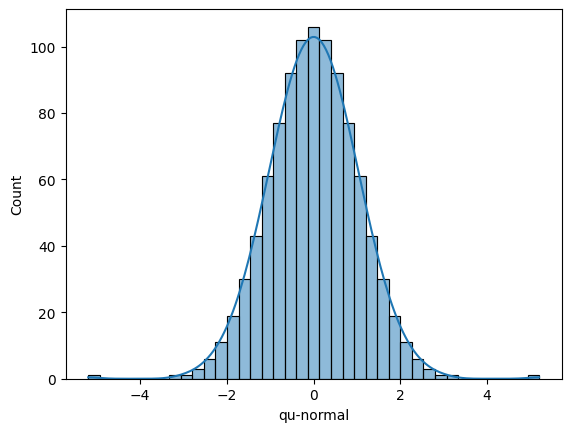

In [33]:
#create a histogram for all columns using sns.hist and kde true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()
